# Linear Models in Machine Learning on Python - Generalized Linear Models

Welcome to the 9th notebook on Linear Models. In this notebook thanks to some aliens named Staticians who live on the planet called earth, we will explore that Linear Regression and Logistic Regression models are actualy a member of a more general model family called Generalized Linear Models.

In [39]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', module='sklearn')
from matplotlib import pyplot
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.preprocessing import PolynomialFeatures

In the previous notebooks, we used linear regression for predicting normally distributed or almost normally distributed outcomes. Afterwards, we used logistic regression for predicting binary (binomial distribution) outcomes. Generalized Linear Models generalize the situation of linear models and provide us a way to use linear models to model non-normally distributed features. In this notebook, we will firstly talk about Maximum Likelihood Estimation and see how this it is related to logistic regression and linear regression. Afterwards, we will derive another model called Poisson regression for count data in which we have a different distribution than normal. Lastly, we will see how we can generalize these steps and use different approaches for different distributions.

This time the notebook will be very mathematical compared to the other notebooks, you may skip it if you would like and start with the implementation of Poisson Regression on Python. However, I recommend you spend some time with these algorithms. It took quite a while for me to get to grasp the mechanisms behind GLM. I still think I have some problems with these algorithms but It is not as hard as it looks.

## Mathematics behind Generalized Linear Models

Welcome to the world of Statistics and Probability... 

###  Maximum Likelihood Estimation 

I will start by introducing something called Maximum Likelihood Estimation. I guess I mentioned this name in one of the Logistic Regression notebooks but didn't explain what it is. To understand maximum likelihood we first need to understand some concepts that are relevant to it(actually they are relevant to Logistic Regression as well). I will talk about these relevant concepts briefly and provide additional sources for each.


#### Bayes Theorem

$$P\left(H\:|\:E\right)=\frac{P\left(H\right)P\left(E\:|\:H\right)}{P\left(E\right)}$$

In the equation, E= Evidence and H= Hypothesis. $P\left(H\:|\:E\right)$ is the probability of hypothesis giving that the evidence is true. This is something called conditional probability because $P\left(H\:|\:E\right)$ equals the probability of H if E is true. Why do we need something like that ? Well, Bayes Theorem is a very general idea but part of it that we are interested in right now is that evidence should not determine our beliefs but it should update our prior beliefs (there are a couple of different interpretation of Bayes Theorem, here I refer the one called Diachronic Bayes Theorem). The reason for doing that is we are not always sure about our data. If the prediction of our model can change with every new evidence we would have many problems in situations like when we have imbalanced classes. To read more about Bayes Theorem, I recommend you to check these videos [link1](https://www.youtube.com/watch?v=HZGCoVF3YvM) and [link2](https://www.youtube.com/watch?v=9wCnvr7Xw4E)

#### Odds

Another important concept that we need to learn is odds. Odds are defined as the probability of an event happening divided by the probability of an event not happening. More mathematically we can define it as $$Odds =\frac{p}{1-p}$$

If you want to read more about Odds, I will share three sources. Two of them are videos from a Youtube channel called Statquest and the last one is an article from Geeksforgeeks. Watch the videos and read the article carefully, it is especially important to understand why we are using log(odds) but not odds [link1](https://www.youtube.com/watch?v=ARfXDSkQf1Y&t=98s), [link2](https://www.youtube.com/watch?v=8nm0G-1uJzA), [link3](https://www.geeksforgeeks.org/log-odds/) and finally reading this discussion can be very good [The Difference Between "Probability" and "Odds"](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/BS704_Confidence_Intervals10.html)

We talked about two important concepts that we need for learning maximum likelihood estimation, as well as, generalized linear models. Now let's define one more thing: Likelihood. <br> 

#### Likelihood

**=>** Likelihood gives us the probability value given our model. To some extent, it's like a function. We provide our model or assumption and in return, likelihood provides us a probability value. These concepts can be very confusing and actually they are. People even use likelihood and probability interchangeably in some cases, however, it is important to understand the real difference between them. At this point, I can recommend watching these two videos [link1](https://www.youtube.com/watch?v=pYxNSUDSFH4&t=135s) and [link2](https://www.youtube.com/watch?v=Dmy3AGIj7_U). I also recommend watching this video about the equivalence of likelihood and probability in some specific cases [link3](https://www.youtube.com/watch?v=bWaACQGsk7c). For a deeper understanding also watching this video can be good [link4](https://www.youtube.com/watch?v=ScduwntrMzc).

#### Maximum Likelihood Estimation

Now we will turn back to maximum likelihood. Let's say we would like to know probability of having breast cancer for a person **given that** we have some instances from our Breast cancer dataset. The probability of having breast cancer given our population(or parameter x) is given by <br> <br>  $$P\left(y=1|\:x;\beta\right)=h_{\beta }\left(x\right)$$ <br> Similarly, we can get the probability of not having a breast cancer by the equation <br><br>   $$ P\left(y=0|x;\beta\right)=1-h_{\beta }\left(x\right)$$<br> When we combine these two equation, we get a general form that we can use either for y=1 and y=0. <br> <br> 
$$P\left(y|x;\beta \right)=\left(h_{\beta }\left(x\right)\right)^y\left(1-h_{\beta}\left(x\right)\right)^{y-1}$$


But the equation above is just for one instance in our dataset. Let's define a function that we will use for all the instances that we are interested in

$$L\left(\beta \right)=P\left(y|x;\beta \:\right)=\prod _{i=1}^mP\left(y^{\left(i\right)}\:|\:x^{\left(i\right)};\beta \:\right)=\prod_{i=1}^m\left(h_{\beta \:}\left(x^{\left(i\right)}\right)\right)^{y^{\left(i\right)}}\left(1-h_{\beta \:}\left(x^{\left(i\right)}\right)\right)^{y^{\left(i\right)}-1}$$

Here we get the joint probability for the instances that we are interested in (in our case we are interested in people with breast cancer). This function is also called the Likelihood Function since it provides us a probability value given a model or assumption. For finding instances with breast cancer, we need to maximize this likelihood for them but before doing that I recommend watching a video from one of the channels that I really like. Even if you don't have any problem understanding Maximum Likelihood so far, I recommend you to watch this [video](https://www.youtube.com/watch?v=I_dhPETvll8).

Let's go on with the second part. We were trying to find a probability value for having breast cancer given a population (a population of people who either has breast cancer or not, just like in our dataset). For finding instances with breast cancer we need to maximize the likelihood function. Therefore, we will take its derivative and set it to zero, so that we will find the value that maximizes it.  

In order to find the people (instances) with breast cancer in our population (in our dataset), we need to maximize the likelihood. The function is dependent on $\beta $ and we can find $\beta$ values that maximize our likelihood function by derivating the function and setting it to zero $\frac{\partial \:}{\partial \beta _j}\left(L\left(\beta \right)\right)=0$. 
However, the problem is derivative of product is a computationally expensive. We can overcome this problem by taking logarithm of the likelihood function. Let's do it:

$$ℓ\left(\beta \right)=log\left(L\left(\beta \right)\right)=log\left(\prod_{i=1}^m\left(h_{\beta }\left(x^{\left(i\right)}\right)\right)^{y^{\left(i\right)}}\:\left(1-h_{\beta }\left(x^{\left(i\right)}\right)\right)^{y^{\left(i\right)}-1}\right)$$

Remember that $log\left(ab\right)=loga+logb$, therefore, our function becomes <br><br>
$$ℓ\left(\beta \right)=\left[\sum _{i=1}^m\:y^{\left(i\right)}log\left(h_{\beta }\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)log\left(1-h_{\beta }\left(x^{\left(i\right)}\right)\right)\right]$$

Wow that is almost the binary cross-entropy function that we have in the first logistic regression notebook.

Here we are trying to get $\beta$ values that maximizes $ℓ\left(θ\right)$. We can use optimization algorithms like [gradient ascent](https://vasugupta2000.medium.com/implementation-of-gradient-ascent-using-logistic-regression-7f5343877c21) to maximize this function, however, we can multiply the function by -1  and minimize this negative log-likelihood which is equalivalent to maximizing the positive version.

$$ℓ\left(\beta \right)=-\left[\sum _{i=1}^m\:y^{\left(i\right)}log\left(h_{\beta }\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)log\left(1-h_{\beta }\left(x^{\left(i\right)}\right)\right)\right]$$

Finally, we got the same cost function in logistic regression notebook 1. You may wonder where is $\frac{1}{m}$, this term is used for making the computation faster so we can add it if we'd like to but it's not in the general equation. 

**Additional sources:**

For the second part, firstly watch the second video of Ben Lambart [link](https://www.youtube.com/watch?v=Z582V53dfr8). I also recommend watching these Youtube videos [Logistic Regression with Maximum Likelihood](https://www.youtube.com/watch?v=TM1lijyQnaI) and [Why maximize 'log' likelihood?](https://www.youtube.com/watch?v=ddqny3aZNPY) also MachineLearningMastery has a good article for using Maximum Likelihood Estimation in Logistic Regression [link](https://machinelearningmastery.com/logistic-regression-with-maximum-likelihood-estimation/). A note that I should also say is we can also get the multinomial logistic regression formula from Maximum Likelihood, I will not explain it in this notebook. Nevertheless, I will share some documents that I used for studying this algorithm and you can find the multinomial case in these documents.

### Using Maximum Likelihood Estimation for deriving Ordinary Least Squares
Above I showed that the cross-entropy function is actually derived from Maximum Likelihood Estimation. In this part, I would like to show also that we can actually derive the cost function of the least-squares estimator from Maximum Likelihood Estimation. Firstly, If you wonder what is Least-Squares Estimator is, it is basically the linear regression algorithm that we used in the notebooks. It's also called Least-Squares Estimator because we are trying to minimize the sum of squared error, in addition, it is also known as Ordinary Least Squares(OLS), so many names for an algorithm right?. 

In the algorithm, we were trying to optimize $\beta$ values (a.k.a weights) to fit the best line. Well, It turns out that if the error term is normally distributed  we can actually use maximum likelihood estimation to derive the least-squares cost function. Let's prove that;


**1**. Let's firstly define what is an error. <br> $$Error\left(E\right)=y_{actual}-y_{predicted}$$<br>


**2**. In this case $Y_{actual}$ (the actual target value that we are trying to predict) is equal to $\beta _0+\beta _1\cdot x+E\:$. Note: $\beta_0$ represents bias term. Therefore we get <br><br> $$Y_{actual}=\beta _0+\beta _1\cdot x+E\:$$<br>

**3**. We also assume that Error is normally distributed, therefore, for error we have zero mean and constant variance. <br><br>$$E^{\left(i\right)}\:∼\:N\:\left(0,\:σ^2\right)$$<br>

**4**. In this case we have normal distribution instead of binomial (that was in the case of Logistic Regression). Therefore, let's also have a quick look at normal distribution equation (that is actually probability density function of normal distribution, check out the [link](https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/#:~:text=PDF%3A%20Probability%20Density%20Function%2C%20returns,equal%20to%20the%20given%20probability.)) that we will use for estimating Likelihood. <br><br> $$PDF\left(x_i\:|\:\beta ,\:\sigma ^2\:\right)=\left(\frac{1}{\sqrt{2\pi \sigma ^2}}\cdot \:exp\left(\frac{^{-\left(y_i-\beta \:^T\cdot x_i\right)^2}}{2\sigma^2}\right)\right)$$<br>

**5**. For m number of instances, our likelihood function for normal distribution will be the following <br><br> $$L=\prod _{i=0}^m\left(\frac{1}{\sqrt{2\pi \sigma^2}}\cdot exp\left(\frac{^{-\left(y_i-\beta \cdot x_i\right)^2}}{2\sigma ^2}\right)\right)=\left[\frac{1}{\sqrt{2\pi \sigma ^2}}\right]^2\cdot \prod _{i=0}^m\left(exp\left(\frac{^{-\left(y_i-\beta^T \cdot x_i\right)^2}}{2\sigma^2}\right)\right)$$<br>

**6**. Again we need to take logarithm of this function to make derivation simpler. <br><br> $$ℓ\left(\beta \right)=log\left(L\right)=m\cdot \:log\left(\left[\frac{1}{\sqrt{2\pi \sigma \:\:^2}}\right]^2\cdot \:\:\prod _{i=0}^m\left(exp\left(\frac{^{-\left(y_i-\beta \:^Tx_i\right)^2}}{2\sigma \:^2}\right)\right)\right)\:=m\cdot \:log\left(\left[\frac{1}{\sqrt{2\pi \sigma ^2}}\right]\right)-\frac{1}{2\sigma \:^2}\sum_{i=1}^m\left(y_i-\beta ^Tx_i\right)^2$$ <br>

**7**. We can omit the first term $(mlog\left(\left[\frac{1}{\sqrt{2\pi \sigma ^2}}\right]\right))$ since it is not parametrized by $\beta$ and we can also omit $\left(\frac{1}{2\sigma \:^2}\right)$ because our choice of $\beta$ doesn't depend on this term. When we get rid of these irrelevant terms, we get almost the same equation that we used in linear regression. In fact, the equation we get is known as residual sum of squares or RSS. <br><br> $$RSS=\sum _{i=1}^m\left(y_i-\beta ^Tx_i\right)^2\:\:\::$$<br> We can scale by the number of instances in our dataset to obtain the exact cost function (Mean Squared Error) that we used in linear regression<br><br>
$$MSE=\frac{1}{m}\sum _{i=1}^m\left(y_i-\beta ^Tx_i\right)^2\:\:\:\:$$ <br> 

**Note for those who are confused why we drop some terms:** Since we are supposed to take derivative of this function to find the $\beta$ values that maximizes the log likelihood, even if we didn't drop the first term $(mlog\left(\left[\frac{1}{\sqrt{2\pi \sigma ^2}}\right]\right))$ we would drop it while taking the derivative since it's not parameterized by $\beta$. Moreover, for $\left(\frac{1}{2\sigma \:^2}\right)$, we can always scale our function with some terms just like we scaled it with number of instances in MSE. Therefore, these terms are not that important for us. 

**8**. Now to maximize the likelihood (or we can also minimize it by multiplying minus one) we need to take derivative of the log likelihood function. <br><br> $$\frac{\partial}{\partial \beta }\left(L\right)=\:2\:\sum _{i=0}^m\left(x_i\left(y_i-\beta ^Tx_i\right)\right)\:\:$$ <br> We can again omit multiplying by two and get an equation for calculating  $\beta$ <br><br>$$\beta  \:=\frac{\sum_{i=1}^M\left(x_i\cdot \:y_i\right)}{\sum_{i=i}^M\left(x_i^2\right)}$$ <br>

The equation we get for calculating beta is actually the same equation that we would arrive if we omitted the intercept term(bias) in linear regression without assuming any particular distribution for error. For the steps that I covered here, I recommend watching this [video](https://www.youtube.com/watch?v=_-Gnu498s3o&t=1s). Also check out this video [Least squares comparison with Maximum Likelihood - proof that OLS is BUE](https://www.youtube.com/watch?v=1ChjaRSZUZk). You can also find these steps in the first paper of Additional Sources part and also in this [article](https://bookdown.org/egarpor/PM-UC3M/app-ext-mle.html)


**To sum up:**

1. The Cross-Entropy function that we used for Logistic Regression is derived from Maximum Likelihood Estimation.
2. Under specific assumptions ( when error term is normally distributed) we can also derive the cost function that we use in Linear Regression from Maximum Likelihood Estimation. Despite that, Linear Regression is a numerical method that we can use without any assumption for distribution. Therefore, even though we can derive the same cost function It doesn't mean that this is true for every case in which we used the algorithm.


I will share some StackExchange discussions that you will find helpful
1. [How does linear regression use the normal distribution?](https://stats.stackexchange.com/questions/148803/how-does-linear-regression-use-the-normal-distribution)
2. [Linear regression: any non-normal distribution giving identity of OLS and MLE?](https://stats.stackexchange.com/questions/173621/linear-regression-any-non-normal-distribution-giving-identity-of-ols-and-mle)
3. [Why is the normality of residuals "barely important at all" for the purpose of estimating the regression line?](https://stats.stackexchange.com/questions/152674/why-is-the-normality-of-residuals-barely-important-at-all-for-the-purpose-of-e)
4. [What if residuals are normally distributed, but y is not?](https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not)

Additional Sources:
1. In this notes you can find brief explanations for linear models and generalized linear models. They are not detailed but well-oriented. [CS229 Lecture notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf)
2. In this paper you can find Maximum Likelihood Estimation for Multinomial Logistic Regression.  [Maximum Likelihood Estimation of Logistic Regression Models: Theory and Implementation](https://czep.net/stat/mlelr.pdf)
3. There two additional books that I used while preparing this notebook. I cannot share any pdf for them but If you are interested in learning more about mathematics behind these algorithms you should get one of these books.  
 * Murphy, K. P. (2022). Probabilistic machine learning: an introduction. MIT press.
 * Alpaydin, E. (2020). Introduction to machine learning. MIT press.
4. Also I can recommend another book for GLM: Dobson, A. J., & Barnett, A. G. (2018). An introduction to generalized linear models. Chapman and Hall/CRC. 

### Generalized Linear Models
Now we came along a long way but still have a long one to go. Let's start with a question that perhaps we should have talked about in the beginning of this notebook. We shortly talked about that we need generalized linear models because we need some other models to use for different distributions. Basically, we are trying to develop some models to deal with non linear data. For instance, would it be suitable to use linear regression for a data like the one in the picture below ? It doesn't look continuous and we probably cannot use polynomial regression as well. As in the case of logistic regression we need some other models to deal with non-continuous data. Generalized Linear Models **generalizes** the situation we had in simple linear regression and let us use some function to deal with non-linearity. We are still using linear models but as we will see, in this case, we use a different approach in which we use some functions called **link functions** to link the relationship between linear predictor and mean. There are also some other details such as we assume that target variable is generated from exponential family of distributions ( like normal, binomial, poisson and gamma). I will talk about these details in the last part. I recommend reading this artile for a good introduction about link functions [article](https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/logistic-regression/link-function/) and there is a good StackOverFlow [discussion](https://stats.stackexchange.com/questions/48594/purpose-of-the-link-function-in-generalized-linear-model)

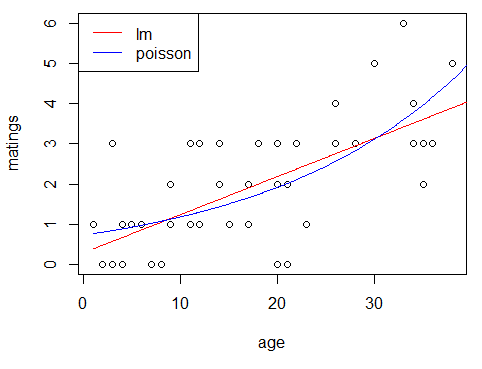

This picture is taken from a stackoverflow discussion [link](https://stackoverflow.com/questions/60982870/how-to-plot-a-linear-regression-model-and-a-poisson-regression-model-on-the-same)



### Logistic Regression Filling the Gap
We learnt logistic regression algorithm in my previous notebooks and in this notebook we saw that the binary cross entropy loss is actually derived from Maximum Likelihood Estimation. There is still a gap in our mathematical background of Logistic Regression. We will fill this gap with understanding the concept of link function in GLM. Let's get started.


In linear regression there is an assumption that mean(a.k.a expected value) of the target is equal to the linear predictor. Mathematically, we say $\mu _i=\beta _0+\beta _ix\:$. In GLM we generalize this assumption by saying that there is a link function which is related to mean and this function equals to the linear predictor.

$$g\left(\mu \right)\:=\beta _0+\beta _1x$$
 
We sometimes also say that the linear predictor is equal to the Greek letter Eta and write the equation as stated below.

$$g\left(\mu \right)\:=\eta =\beta _0+\beta _1x$$

Also there are some properties that the link function should follow
1. Link function must be monotonic
2. It must be invertible so that there can only be one mean value for each predictor.
3. It must be differentiable (we need to differentiate it so that we can find $\beta$)

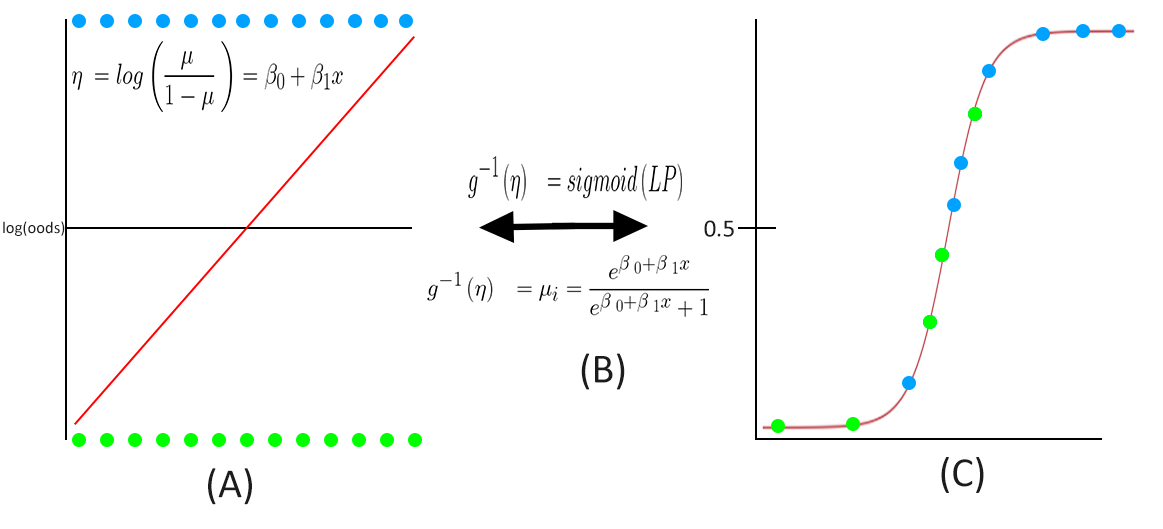

**What is the relationship between logistic regression and these link functions?**

In logistic regression we have an additional step that we use this link function. In logistic regression we use a link function called **logit**. 

$$logit=log\left(\frac{\mu \:\:}{1-\mu }\:\right)$$

As I stated above the link function equals to the linear predictor, therefore, in logistic regression we equivalance the below.
$$g\left(\mu \right)=log\left(\frac{\mu }{1-\mu }\right)=\beta \:_0+\beta_1x$$

It turns out that **the mean ($\mu$) is equal to probability in binomial distribution** and in this case with the link function we have the below equivalance.

$$g\left(\mu \right)\:=log\left(\frac{p}{1-p}\right)=\beta \:_0+\beta_1x$$

Wow!! By using the link function we derived a relationship between the linear predictor and log odds. You can see this relationship in the **picture A**. In Generalized Linear Models, we are using the link function (as we used it here for logistic regression) to make a relationship between the linear predictor and the mean of target. In the case of Logistic Regression, the mean equals to the probability, therefore, we are deriving a relationship between log odds and the linear predictor.


Then we need to take inverse of this link function so that we can get estimated probability values for prediction. And it turns out that the inverse of logit function equals to sigmoid function.

$$logit^{-1}\left(\mu \:\right)=\sigma \:\left(\mu \:\right)$$

We can use sigmoid function to find mean/probability values as follows. Here LP represent Linear Predictor($\beta _0+\beta _1x$)

$$p=\mu _i=sigmoid\left(LP\right)=\frac{e^{^{\beta _0+\beta_1x}}}{e^{^{\beta_0+\beta _1x}}+1}$$

As I showed it in the part B of the picture above, we are using the sigmoid function to get mean/probability values and then just like we talked about it in logistic regression notebook 1, we are using this probability for prediction. 

**Summing up:** In logistic regression we use the link function logit to derive a relationship between the linear predictor and log odds ratio. Afterwards, by using inverse of this link function a.k.a sigmoid function we get estimated probability values to predict the class of an instance. All other the steps such as optimization stays the same.


1. I recommend watching Statquest's video on this so that with animations you can understand how it exactly works [link](https://www.youtube.com/watch?v=BfKanl1aSG0&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe&index=4) 
2. Ritvikmath has a good explanation video on this topic as well I also recommend watching it [link](https://www.youtube.com/watch?v=VOIhswqFWVc&t=41s)
3. You can find a good explanation for log odds and how logistic regression utilizes it in this [article](https://www.geeksforgeeks.org/log-odds/)
4. I also came across with two Medium articles [article1](https://medium.com/codex/logistic-regression-and-maximum-likelihood-estimation-function-5d8d998245f9) [article2](https://towardsdatascience.com/maximum-likelihood-the-easy-way-1f14c0e2a5ce) in which you can also find more about logistic regression in context of glm

I recommend checking all these links because It's good to read different sources to have an intuitive idea of the algorithm.

### Poisson Regression






Sometimes we need some models to cope with questions like “How many goods will i sell today ?” or “How many people will come to visit my shop ?” These are basic questions that we can encounter while dealing with count data. Count data is also a datatype we cannot model effectively with linear regression(in some cases actually we can, I generally try it as a baseline model while dealing with count data). You can actually see an example of this data in the first picture.
To model count data we can use another member of GLM named Poisson Regression. We need to do two similar steps that we did for Logistic Regression to understand the mathematics behind it.

1. Firstly, I will show the link function that we can use for Poisson Regression to derive a relationship between the linear predictor and mean.
2. Then I will use Maximum Likelihood Estimation for Poisson Distribution to derive a cost function.

Let's get started.

#### Link Function

In Poisson Regression we have the log-link function.<br><br>
$$g\left(\mu \right)=log\left(\mu \right)=\beta _0+\beta _1x$$<br>

Since the inverse of natural log is exponential we can directly find the mean as follows.<br><br>

$$\mu \:=g^{-1}\left(\beta_0+\beta_1x\right)=exp\left(\beta_0+\beta_1x\right)$$


#### Maximum Likelihood Estimation

The probability density function of Poisson Distribution is stated below.<br><br>

$$f\left(\lambda ,y\right)=\frac{\lambda ^ye^{-\lambda }}{k!}$$

In probability density function of poisson distribution, the lambda is equal to the mean and variance. $\lambda=\mu$. This equivalence can also be written in terms of expected value as the following $\lambda =E\left(X\right)=Var\left(X\right)$. By using this PDF, we will derive the log likelihood function for poisson regression. <br><br>

$$L\left(\lambda \:,y\right)=\prod_{i=1}^{m\:}\left(\frac{\lambda ^y\cdot e^{-\lambda }}{k!}\right)\:$$<br>

Now let's take logarithm of the both sides to make the derivation simpler. <br><br>

$$ℓ=log\left(\prod_{i=1}^{m\:}\left(\frac{\lambda^y\cdot e^{-\lambda}}{k!}\right)\right)=\sum_{i=1}^{m\:}\left[y\cdot log\left(\lambda \:\right)-\lambda-log\left(y!\right)\right]$$<br>

We end up having the following equation for likelihood analysis. <br><br>
$$ℓ=\sum_{i=1}^{m\:}ylog\left(\lambda\right)-\sum_{i=1}^{m\:}\lambda - \sum_{i=1}^{m\:}log\left(y!\right)$$<br>


I previously said that $\lambda=\mu$ and $\mu$ is also related to our linear predictor. Let's rewrite the likelihood function so that it is parameterized by the linear predictor.<br><br>

$$ℓ\left(\beta\right)=\sum_{i=1}^{m}y\left(\beta_0+\beta_1x\right)-\sum _{i=1}^{m}exp\left(\beta_0+\beta _1x\right)$$<br>

I got rid of the last sum $\sum _{i=1}^{m\:}log\left(y!\right)$ since it is not parameterized by linear predictor.<br><br>

Finally we derived our maximum likelihood function for poisson regression. Now let's get derivative of this function so that we can update the parameters with respect to gradient vector. Firstly, I will take derivative of the function with respect to weights($\beta_1$) and then with respect to bias term ($\beta_0$)

$$\frac{\partial}{\partial\beta _1}\left(ℓ\left(\beta\right)\right)\:=\sum_{i=1}^n\left(y_i-exp\left(\beta_0+\beta _1x\right)\right)x_i$$

For derivation with respect to bias term.

$$\frac{\partial}{\partial \beta _0}\left(ℓ\left(\beta \right)\right)\:=\sum _{i=1}^n\left(y_i-exp\left(\beta_0+\beta _1x\right)\right)$$

Now we can update bias and weights by using the derivatives and optimize our poisson regression model.

Resources:
1. I recommend reading this medium article about mathematics behind Poisson Regression [link](https://medium.com/lcc-unison/how-to-poisson-regression-model-python-implementation-1c672582eb96)
2. I also found one of the articles that I read when I started first learning about GLM. I do remember I found this article very informative [link](https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab#:~:text=In%20the%20case%20of%20Poisson%20regression%2C%20the%20typical%20link%20function,generates%20the%20observed%20variable%20y.)
3. For Maximum Likelihood of Poisson Distribution, you can find more information on this website [link](https://www.statology.org/mle-poisson-distribution/)
4. Lastly there are some lecture notes that I utilized while writing this part. I also recommend reading them [link1](https://www.stt.msu.edu/users/pszhong/Lecture_10_Spring_2017.pdf),[link2](http://home.iitk.ac.in/~shalab/regression/Chapter15-Regression-PoissonRegressionModels.pdf) and [link3](https://personal.psu.edu/abs12/stat504/online/07_poisson/04_poisson_model.htm)

# Using Poisson Regression on Python

## Competetion Awards Dataset

I will start with a simple example. We will try to predict number of awards in a computation.

In [4]:
data=pd.read_csv("competition_awards_data.csv")
data.head(5)

,Awards,Math Score
0,0,43
1,0,38
2,0,41
3,0,33
4,0,39


Let's see how the data looks like.

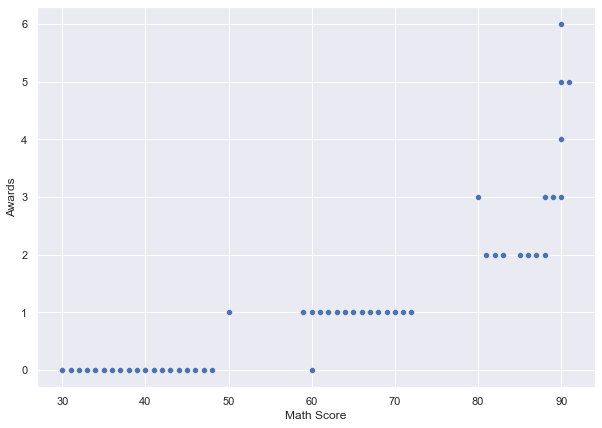

In [5]:
sns.set_theme()
sns.set(rc={'figure.figsize':(10,7)})
plot=sns.scatterplot(data=data, x="Math Score", y="Awards")

Our model will try to predict the number of awards by using math scores. Let's drop extract awards from the data and drop the column.

In [6]:
target=data["Awards"]
data.drop(['Awards'],axis=1,inplace=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 42)

Now let's use `PoissonRegressor()` and tune it with GridSearchCV().

In [11]:
poisson_reg=PoissonRegressor(max_iter=500)

In [18]:
params = {
    'alpha': [0.1,0.3,0.5,0.7,1,2,5,10,20,30,50,70,100],
    'fit_intercept': (True, False),
    'warm_start':(True,False)
}

In [23]:
gscv=GridSearchCV(poisson_reg, params, cv=10,verbose=2,scoring="neg_mean_squared_log_error")

In [ ]:
model=gscv.fit(X_train,y_train)

In [25]:
model.best_params_

{'alpha': 20, 'fit_intercept': True, 'warm_start': True}

In [26]:
format(r2_score(model.predict(X_test),y_test),'f')

'0.828345'

$R^2$ looks not very good but it is relatively good. Actually I guess we can so much improve this score with using some preprocessing and adding some additional terms.

## NYC Bicycle Counts

We will use NYC Bicycle Count dataset for applying Poisson Regression. Our aim is to predict the number of bicycles crossed from one of the bridges by using the predictors. Let's get started.

In [4]:
data=pd.read_csv("nyc-east-river-bicycle-counts.csv")
data.head(5)

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


We loaded the dataset. Let's look for missing values.

In [5]:
data.columns[data.isnull().sum() > 5]

Index([], dtype='object')

Looks like we don't have any NaN values in the dataset. That makes our job easier. Additionally, I will drop some unnecessary columns.

In [6]:
data.drop(["Day","Unnamed: 0"],axis=1,inplace=True)

In [7]:
data.head(5)

,Date,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


We only have one problem about the data. In precipitation part, some of the values has string part. Let's group them to see the problem.

In [8]:
data.groupby('Precipitation')['Precipitation'].nunique()

Precipitation
0           1
0.01        1
0.05        1
0.09        1
0.15        1
0.16        1
0.2         1
0.24        1
0.47 (S)    1
T           1
Name: Precipitation, dtype: int64

I will change rows with the value 0.47 (S) as 0.47

In [9]:
data = data[data.Precipitation != "T"]

In [10]:
data['Precipitation'] = data['Precipitation'].replace(r'[^\d.]', ' ', regex=True)

In [11]:
data.groupby('Precipitation')['Precipitation'].nunique()

Precipitation
0           1
0.01        1
0.05        1
0.09        1
0.15        1
0.16        1
0.2         1
0.24        1
0.47        1
Name: Precipitation, dtype: int64

Now I will define a function that plots number of bicycles crossed over the Bridge that I select.

In [12]:
def plot_count(y_axis):
    sns.set_theme()
    sns.set(rc={'figure.figsize':(15,10)})
    plot=sns.scatterplot(data=data, x="Date", y=y_axis)
    plt.setp(plot.get_xticklabels(), rotation=45);

Let's plot the number of bicycles passed over Brooklyn Bridge.

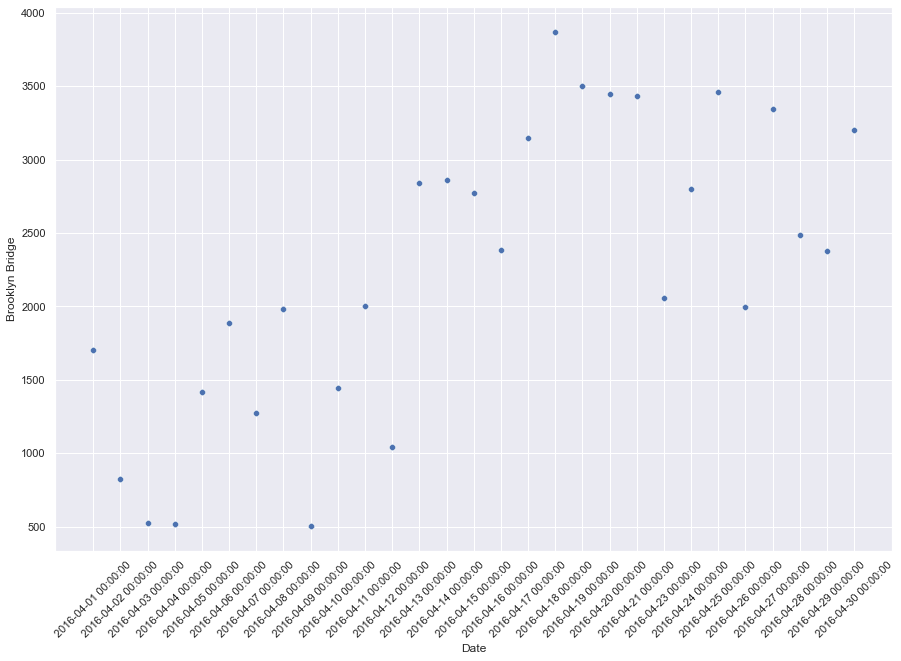

In [395]:
plot_count("Brooklyn Bridge")

Let's also plot for other bridges.

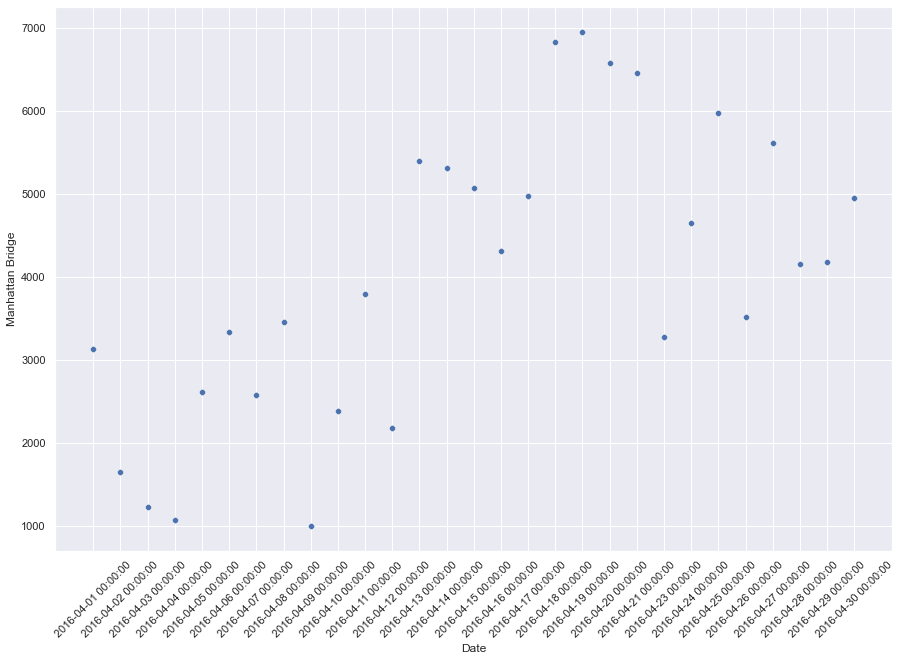

In [232]:
plot_count("Manhattan Bridge")

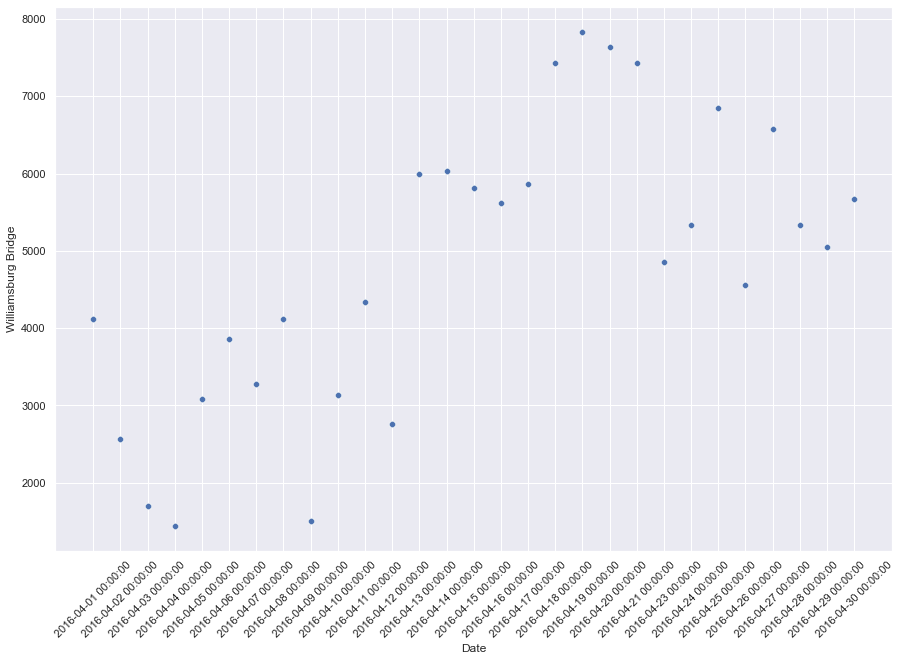

In [233]:
plot_count("Williamsburg Bridge")

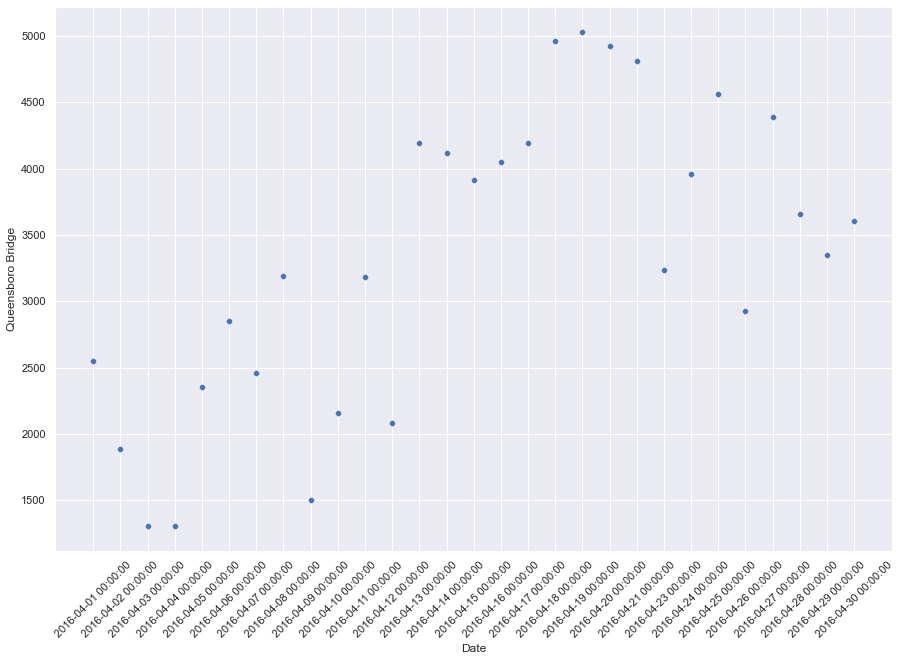

In [234]:
plot_count("Queensboro Bridge")

I will take the `splitdata()` function that we created in the previous notebooks for seperating Date into Year/Month/Day columns.

In [13]:
def splitdate(data_s):
    data_s["Date"] = pd.to_datetime(data_s["Date"]) #convert it to date
    data_s["Year"]=data_s["Date"].dt.year # Parsing year 
    data_s["Month"]=data_s["Date"].dt.month # Parsing month
    data_s["Day"]=data_s["Date"].dt.day # Parsing day
    data_s =  data_s.drop(["Date"], axis=1) # Dropping original Date row
    return data_s;

In [14]:
data_processed=splitdate(data)
data_processed.head(5)

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Year,Month,Day
0,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497,2016,4,1
1,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922,2016,4,2
2,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759,2016,4,3
3,44.1,33.1,0.47,521.0,1067,1440.0,1307.0,4335,2016,4,4
4,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471,2016,4,5


I will use the model for predicting the numbers bicycles passed over Manhattan Bridge (because it is the one I like the most between the bridges we have in this dataset).

In [15]:
target=data_processed["Manhattan Bridge"]
data_processed=data_processed.drop(["Total", "Manhattan Bridge"],axis=1) # I also drop total not for any spesific reason.

In [16]:
data_processed.head(5)

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Williamsburg Bridge,Queensboro Bridge,Year,Month,Day
0,78.1,66.0,0.01,1704.0,4115.0,2552.0,2016,4,1
1,55.0,48.9,0.15,827.0,2565.0,1884.0,2016,4,2
2,39.9,34.0,0.09,526.0,1695.0,1306.0,2016,4,3
3,44.1,33.1,0.47,521.0,1440.0,1307.0,2016,4,4
4,42.1,26.1,0,1416.0,3081.0,2357.0,2016,4,5


Let's use standardscaler on predictors (I recommend training the model without using StandardScaler() and see how drastically it changes the results).

In [17]:
data_processed=StandardScaler().fit_transform(data_processed)

This time I will also add polynomial terms.

In [18]:
data_processed_pf=PolynomialFeatures(degree=3, include_bias=True).fit_transform(data_processed)

Okay we are ready to split train and test data.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data_processed_pf, target, test_size = 0.2, random_state = 42)

Now by using `PoissonRegressor()` and `GridSearchCV()` I will train the model.

In [109]:
poisson_reg=PoissonRegressor(max_iter=300)

In [110]:
params = {
    'alpha': np.geomspace(1e-9, 1e1, num=20),
    'fit_intercept': (True, False),
    'warm_start':(True,False)
}

In [111]:
gscv=GridSearchCV(poisson_reg, params, cv=10,verbose=20,scoring="r2")

In [ ]:
model=gscv.fit(X_train,y_train)

In [113]:
predicted=gscv.predict(X_test)

In [114]:
format(r2_score(predicted,y_test),'f')

'1.000000'

In [115]:
format(mean_squared_error(predicted,y_test),'f')

'0.565144'

How well would a linear regression line fit this data ? Let's use `Ridge()` and `GridSearchCV()` to find out.

In [30]:
params = {
    'alpha': np.geomspace(1e-9, 1e1, num=10),
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'fit_intercept': [True, False],
}

In [ ]:
ridgemodel= GridSearchCV(Ridge(), params, scoring='neg_mean_squared_error',verbose=42,cv=10).fit(X_train, y_train)

In [32]:
format(r2_score(ridgemodel.predict(X_test),y_test),'f')

'1.000000'

In [33]:
format(mean_squared_error(ridgemodel.predict(X_test),y_test),'f')

'0.000000'

It looks like Ridge Regression provides us a better model. I find to learn the idea behind GLM important, moreover the model family provides us ways to deal with non normally distributed data which can be very useful as well. However, my personal experience is that if we organize the data in a good fashion we can generally get a better result with linear regression compared to Poisson Regression. This may be because that I haven't actually used Poisson Regression for a lot of different datasets as well as I didn't use it for a real life example. On the other hand, I find it reasonable to use both linear regression and poisson regression when dealing with count data because no free lunch.

WE ARE DONE!!

# Generalizing the Linear Models

## 1. Exponential Dispersion Family
Above I said that we assume response variable is generated from exponential family of distributions. This family is called Exponential Dispersion Family and they are basically a set of probability distributions which contains members like normal, binomial and poisson distributions (actually it contains more than that but I will focus on only these distributions). To be a part of this family, distributions must have a probability density function in the way below.

$$f_y\left(y\right)=f\left(y;\:θ\right)\:=\:s\left(y\right)t\left(θ\right)e^{a\left(y\right)b\left(θ\right)}=exp\left(\left(\frac{1}{a\left(\phi \right)}\cdot \left(y\cdot\theta -b\left(\theta\right)\right)+c\left(y,\phi\right)\right)\right)$$ 


Let's spend some time to understand this equation. 

1. In the equation above $a\left(\phi \right)$ represent dispersion parameter. GLM uses this parameter to model the variability in our data. We didn't talk about dispersion directly before but actually we saw some examples of it. For instance, variance and standart deviation are all examples of dispersion. You can find more about this concept in this [website](https://datatab.net/tutorial/dispersion-parameter).
2. $\theta$ is called natural parameter. Every distribution of Exponential family has a natural parameter space denoted by $\theta$. In GLM we relate this natural parameter to linear predictor, in other words, we say that natural parameter is equal to the link function. In this case the link function is called canonical link function. <br><br>
$$\theta =\eta =g\left(\mu \right)$$<br>
One of the ideas behind the need for using canonical link function is that, we don't always know in advance which link function we should use for a particular distribution. By relating the link function to natural parameter we expect the distribution to use its natural link function for our need, for instance, we use logit as our canonical link function for logistic regression. However, we can also use another link function called Probit. Moreover, even though we used log-link for poisson regression we can also use identity function. So canonical link functions are the functions that generally works best with the models but we always have some alternative ones that we can use. Moreover, as we will see soon relating natural parameter to linear predictor simplifies likelihood analysis. You can find about more about the relationship between natural parameter and linear predictor in these discussion [What is the difference between a "link function" and a "canonical link function" for GLM](https://stats.stackexchange.com/questions/40876/what-is-the-difference-between-a-link-function-and-a-canonical-link-function) and [Difference between logit and probit models](https://stats.stackexchange.com/questions/20523/difference-between-logit-and-probit-models)
3. The last parameter $c\left(y,\phi \right)$ is not important for us since it is not related to natural parameter.

Now let's prove that bernoulli and poisson distributions are part of that family

### Bernoulli Distribution


The Bernoulli Distribution has the PDF  $$f_y\left(y\right)=p^y\left(1-p\right)^{1-p}$$

By using rules of logarithm we can convert the function into this form as follows.<br><br>
$$f_y=e^{ln\left(p^y\left(1-p\right)^{1-y}\right)}\:=e^{yln\left(p\right)+\left(1-y\right)ln\left(1-p\right)}=e^{y\left(ln\left(p\right)-ln\left(1-p\right)\right)+ln\left(1-p\right)}=e^{yln\left(\frac{p}{1-p}\right)+ln\left(1-p\right)}$$<br>

We end up having the following exponential equation for bernoulli distribution.<br><br> $$f_y=exp\left(^{yln\left(\frac{p}{1-p}\right)+ln\left(1-p\right)}\right)$$<br>

In the equation above, $a\left(\phi \right)=1$ and $\:\theta =ln\left(\frac{p}{1-p}\right)$. Moreover, we have $b\left(\theta \right)=-ln\left(1-p\right)$. 

Since $ \mu = p $ we can say $\theta =logit\left(P\right)$ and take inverse of the function as following $p=sigmoid\left(\theta \right)=\frac{e^{\left(\theta\right)}}{1+e^{\left(\theta \right)}}$  <br>

Therefore we can write down an equation for $b\left(\theta \right)$ as follows

$$b\left(\theta \right)=-ln\left(1-\frac{e^{\theta }}{1+e^{\theta }}\right)=-ln\left(\frac{1}{1+e^{\theta }}\right)=ln\left(1+e^{\left(\theta\right)}\right)$$<br>

And finally we get the PDF <br><br> $$f_y\left(y\right)=exp\left(y\cdot\theta-ln\left(1+e^{\theta }\right)\right)$$

We converted Bernoulli distribution into the general form of exponential dispersion family.

### Poisson Distribution

The Poisson Distribution has the PDF  $$f_y\left(y\right)=\frac{e^{-\lambda }\lambda ^y}{y!}$$<br>

We can write this PDF in exponential form as follows <br><br> $$f_y\left(y\right)=\frac{e^{-\lambda }\lambda ^y}{y!}=exp\left(yln\left(\lambda \right)-\lambda -ln\left(y!\right)\right)$$<br>

Then we again have $a\left(\phi \right)=1$ and $\theta =ln\left(\lambda \right)$. Then we can define $$b\left(\theta \right)=\lambda =e^{\theta }$$

## 2. Mean and Variance

Next let's talk about mean and variance. For the exponential family we have the two following equivalances.

1. The mean is equal to derivative of $b\left(\theta \right)$ <br> $$E\left(y\right)=b'\left(\theta \right)=\mu $$<br>
2. The variance is equal to second derivative of $b\left(\theta \right)$ <br> $$V\left(\mu \right)=b''\left(\theta \right)$$

I will not go into details of proving these two equivalances but you can find the proof in this [video](https://www.youtube.com/watch?v=2Y5yREdEoIk&list=PLJ71tqAZr197DkSiGT7DD9dMYxkyZX0ti&index=7)

However, there is another part related to mean that I would like to prove. While I was talking about Logistic Regression I said that probability is equal to mean and for poisson regression I said that mean equals to lambda. These are properties of Bernoulli and Poisson Distribution, let's prove them.

**For Bernoulli Distribution:**

$$b'\left(\theta \right)=\frac{d}{d\left(\theta \right)}\left(ln\left(1+e^{\theta }\right)\right)=\frac{e^{\theta}}{1+e^{\theta}}$$<br>

As we previously saw this equation is equal to probability.

**For Poisson Distribution**
<br><br> $$b'\left(\theta\right)=\frac{d}{d\left(\theta \right)}\left(e^{\theta}\right)=e^{\theta}$$

And again we know that $$\lambda =e^{\theta }$$

You can find more about proofs of mean and variance in GLM in this [document](http://home.iitk.ac.in/~shalab/regression/Chapter16-Regression-Generalized%20Linear%20Models.pdf)

## 3. Likelihood Analysis

For both Logistic Regression and Poisson Regression we derived Maximum Likelihood Estimation by using PDF of Bernoulli and Poisson distributions. However, one of the important concept for GLM we need our models to be generalized. What I mean by that, we need some general equations that we can use for different distributions of exponential family. We only see Bernoulli and Poisson also Normal (to some extent) but there are also other distributions that we can use to model different kinds of data. In this part, by using the general PDF form of Exponential Dispersion Family we will derive an Likelihood Function that we can use easily for every distribution in the family. Let's get started.

1. Firstly let's rewrite the likelihood function in terms of PDF of exponential family.
$$PDF=exp\left(\left(\frac{1}{a\left(\phi \:\right)}\cdot \:\left(y\cdot \theta \:-b\left(\theta \right)\right)+c\left(y,\phi \right)\right)\right)$$<br>
2. Let's take logarithm of this function.$$log\:f\left(y\right)=\frac{1}{a\left(\phi \:\right)}\left(y\cdot \theta \:-b\left(\theta \:\right)\right)+c\left(y,\phi \:\right)$$<br>
3. We know that $\beta$ values are connected to $\theta$ with the following equations. <br><br>$$b'\left(\theta \right)=\mu ,\:g\left(\mu \right)=\eta =\beta _0+\beta _1x$$<br>
4. I will use the chain rule to take derivative of this function and then calculate derivatives one by one. <br><br> $$\frac{\partial \left(logf_y\left(y\right)\right)}{\partial \beta _j}=\frac{\partial \:}{\partial \theta \:}\left(logf\right)\frac{\partial \:}{\partial \mu \:}\left(\theta \right)\frac{\partial \:\:}{\partial \eta }\left(\mu \right)\frac{\partial \:\:}{\partial \beta _j\:}\left(\eta \right)$$

Let's find derivatives.
$$\left(1\right)=\frac{\partial \:}{\partial \:\theta \:}\left(logf\right)=\frac{y-b'\left(\theta \right)}{a\left(\phi \right)}$$
$$\left(2\right)=\frac{\partial \:}{\partial\mu}\left(\theta \right)=\frac{a\left(\phi \right)}{V\left(y\right)}$$
$$\left(4\right)=\frac{\partial \:}{\partial \beta_j}\left(\eta \right)=x_j$$

Where is the third derivative ? The third term depends on the link function. It will change according to the spesific choice of user. Therefore I will combine the terms in a general formule without taking derivative of the third term.

$$\frac{y-b'\left(\theta \right)}{V\left(y\right)}\cdot x_j\cdot \frac{\partial }{\partial \eta }\left(\mu \right)=0$$

and we can generalize it as
$$\sum _{i=1}^n\left(\frac{y_i-\mu _i}{V\left(y_i\right)}\cdot \:x_{ij}\cdot \:\frac{\partial \:}{\partial \:\eta _i\:}\left(\mu _i\:\right)\right)=0$$

This is the general form of the function. However, when we use a canonical link function which says that $\theta =\eta \:$ and $g\left(\mu \right)=\theta $ Some terms in the derivative will cancel each other out and we will get a simplified likelihood function for canonical case. This is actually the simplification that I talked about in exponential dispersion family part. The canonical link function simplified our calculation here.
$$\frac{y-b'\left(\theta \right)}{a\left(\phi \right)}\cdot x_j$$


We need to use a numerical solution algorithm to optimize this function (there isn't any closed form solution). We can use methods such as
1. Newton Raphson Method
2. Fisher Scoring
3. Iterative Reweighted Least Squares


Nonetheless, I will not go into details of solution of the general or canonical form by using these methods but you can watch this video to learn more about solutions of the general form [link](https://www.youtube.com/watch?v=45lb8Xwm1E4&list=PLJ71tqAZr197DkSiGT7DD9dMYxkyZX0ti&index=10). There are also other algorithms we can use as well, for instance, we can use SGD.


Lastly, let's use the general form for deriving the likelihood function for poisson regression so that we can see actually the general form works.


The Poisson Distribution has the PDF  $$f_y\left(y\right)=\frac{e^{-\lambda \:}\lambda \:^y}{y!}=exp\left(yln\left(\lambda \:\right)-\lambda \:-ln\left(y!\right)\right)$$<br>

We know the following terms are equal.
1. $\theta =ln\left(\lambda \right)$

2. $a\left(\phi \right)=1$

3. $b\left(\theta \right)=\lambda \:=e^{\theta \:}=\mu $

In poisson regression we used the canonical link function log-link. Therefore, here we should use the canonical form of likelihood analysis.

$$\frac{y-b'\left(\theta \right)}{a\left(\phi \right)}\cdot \:x_j=\:\:\left(y-\mu \:\right)\cdot x_j=\left(y-exp\left(\theta \right)\right)\cdot \:x_j=\left(y-exp\left(\beta _0+\beta _1\cdot x\:\right)\right)\cdot \:\:x_j$$

When we generalize it we get $$\frac{\partial }{\partial \beta _j}\left(ℓ\right)=\sum _{i=0}^m\:\left(y_i-exp\left(\beta _0+\beta \:_1\cdot \:x_i\:\right)\right)\cdot x_{ij}$$

This actually the same equation that we got when we estimated the maximum likelihood for Poisson Distribution. 

### 4. Deviance
When we were talking about linear regression we talked about residuals, however, in GLM we use another metric called Deviance more often than residuals. I will briefly talk about Deviance and to begin with, I recommend watching this video from Statquest about Deviance [link](https://www.youtube.com/watch?v=JC56jS2gVUE)

There are three types of deviance
1. Unit Deviance
2. Total Deviance
3. Null Deviance

I will only talk about Unit Deviance and Total Deviance. However, as always I will share other sources in which you can find more about all types of deviance. Unit deviance can be calculated by the following equation $$d\left(y,\mu \:\:\right)=2\left(t\left(y,y\:\right)-t\left(y,\mu \:\:\:\right)\right)$$

In the above equation $t\left(y,\mu \:\right)=y\cdot \:\theta \:\left(\mu \right)-b\left(\theta \:\left(\mu \right)\right)$

We can sum up all the unit deviance and get Total Deviance. $$\sum _{i=0}^mD\left(y_i,\mu _i\right)$$

Actually there are more about deviance and this part is not even an introduction for deviance. I just wanted to write down some of the important equations for deviance in this notebook. I will share a youtube video in which you can find equations for calculating deviance for different members of exponential family as well as explenation for deviance types (Unit,Total,Null)    [video](https://www.youtube.com/watch?v=JUrKnBbDDzU&list=PLJ71tqAZr197DkSiGT7DD9dMYxkyZX0ti&index=8). 

WE ARE DONE!!!

Resources for Mathematical Parts:
1. In this document you can find brief explanations for GLM [Advanced Methods for Data Analysis ](https://www.stat.cmu.edu/~ryantibs/advmethods/notes/glm.pdf)
2. There is a lecture slide that I used for writing canonical link function part, you can check it as well [link](https://cedar.buffalo.edu/~srihari/CSE574/Chap4/4.3.6-CanonicalLink.pdf)
3. This is a brief mathematical article on Poisson Regression [Poisson Regression Models 
](http://home.iitk.ac.in/~shalab/regression/Chapter15-Regression-PoissonRegressionModels.pdf)
4. There are some good notes from Stanford University [link](https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf)
5. In this link you can learn more about Deviance [link](https://www.datascienceblog.net/post/machine-learning/interpreting_generalized_linear_models/)
6. For more about mean and variance of Bernoulli distribution [link](https://www.youtube.com/watch?v=bC6WIpRgMuc)
**7. Lastly I recommend watching all the videos in this youtube serie [link](https://www.youtube.com/watch?v=ddCO2714W-o&list=PLJ71tqAZr197DkSiGT7DD9dMYxkyZX0ti&index=1)**

